In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import folium
from folium.plugins import HeatMap
#import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, box
import shapely
#import fiona
%matplotlib inline
import seaborn as sns
sns.set_style(style='darkgrid')

In [2]:
ls ..\Data

ls: ..Data: No such file or directory


In [3]:
tifhist_df = pd.read_csv('../Data/TIF_Funding_Sources_and_Uses_by_TIF__Fiscal_Year__and_Type.csv')

In [4]:
tifhist_df.head()

,Fiscal Year,TIF Number,TIF District,Type,Activity,Amount
0,2002,T-111,105th/Vincennes,Revenues,Tax revenue,0
1,2009,T-111,105th/Vincennes,Revenues,Tax revenue,175776
2,2006,T-111,105th/Vincennes,Revenues,Tax revenue,130723
3,2001,T-111,105th/Vincennes,Revenues,Tax revenue,0
4,2007,T-111,105th/Vincennes,Revenues,Tax revenue,169551


In [5]:
tifhist_df.Type.unique()

array(['Revenues', 'Expenditures', 'Transfers',
       'Distributions to Taxing Districts', 'Other Funding Sources',
       'Other Uses'], dtype=object)

In [6]:
tifhist_df.Activity.unique()

array(['Tax revenue', 'Interest', 'Financing',
       'Land sales & rental revenue', 'Miscellaneous revenue',
       'Admin., studies & services', 'Site assembly & prep.',
       'Development', 'Public improvements', 'Job training',
       'Transfers in', 'Transfers out',
       'Distributions to taxing districts', 'Proceeds of debt'],
      dtype=object)

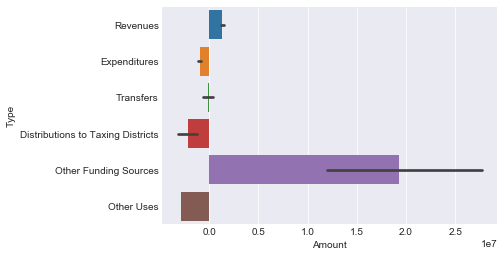

In [198]:
sns.barplot(tifhist_df['Amount'], tifhist_df['Type'])


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

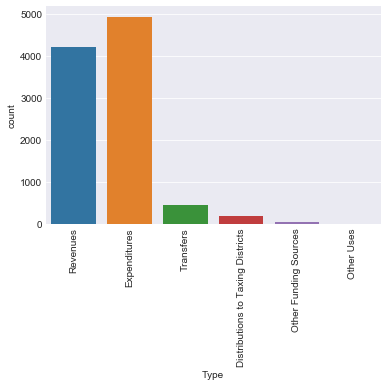

In [199]:
sns.countplot(tifhist_df['Type'])
plt.xticks(rotation=90)

In [200]:
job_train = tifhist_df.loc[tifhist_df['Activity']=='Job training']





In [201]:
job_train.sort_values(by='TIF District')



,Fiscal Year,TIF Number,TIF District,Type,Activity,Amount
8085,2007,T-125,119th/I-57,Expenditures,Job training,-133401
8086,2008,T-125,119th/I-57,Expenditures,Job training,-106599
8087,2014,T-125,119th/I-57,Expenditures,Job training,-8500
8088,2005,T-072,24th/Michigan,Expenditures,Job training,-8894
8089,2004,T-072,24th/Michigan,Expenditures,Job training,-2
8090,2003,T-072,24th/Michigan,Expenditures,Job training,-130
8091,2012,T-072,24th/Michigan,Expenditures,Job training,-16494
8092,2011,T-072,24th/Michigan,Expenditures,Job training,-9156
8105,2012,T-001,35th/Halsted,Expenditures,Job training,-72080
8104,2011,T-001,35th/Halsted,Expenditures,Job training,-54774


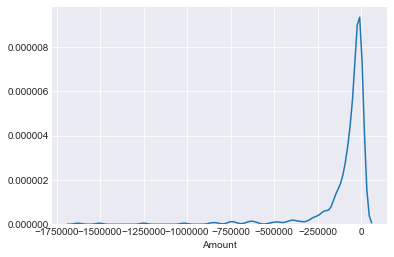

In [202]:
sns.distplot(job_train.Amount, hist=False)

In [204]:
job_train.columns

Index(['Fiscal Year', 'TIF Number', 'TIF District', 'Type', 'Activity',
       'Amount'],
      dtype='object')

In [205]:
tifhist_df.Type.unique()

array(['Revenues', 'Expenditures', 'Transfers',
       'Distributions to Taxing Districts', 'Other Funding Sources',
       'Other Uses'], dtype=object)

Text(0.5,1,'Revenues and expenditures by fiscal year')

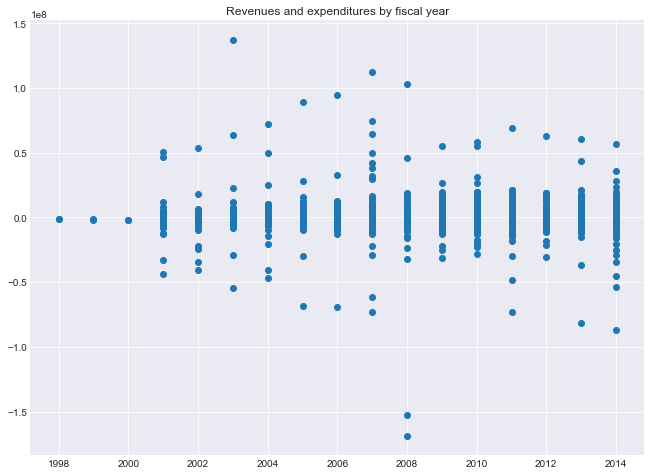

In [206]:
plt.scatter(x='Fiscal Year', y='Amount', data=tifhist_df)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 8)
plt.title('Revenues and expenditures by fiscal year')

Text(0.5,1,'Revenues and expenditures by fiscal year')

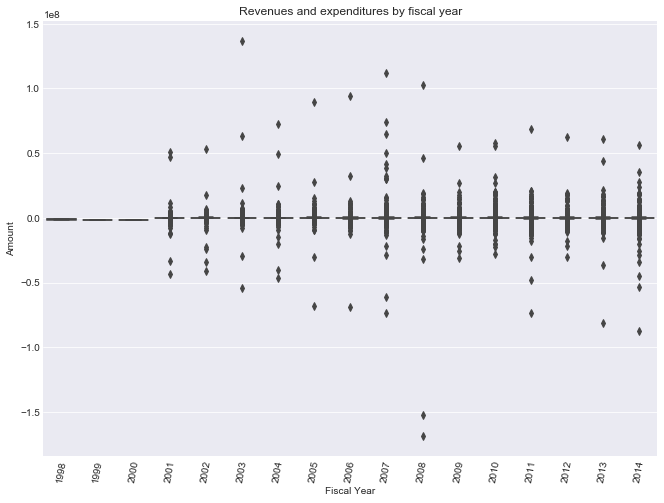

In [207]:
sns.boxplot(x='Fiscal Year', y='Amount', data=tifhist_df)
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 8)
plt.title('Revenues and expenditures by fiscal year')

Text(0.5,1,'Revenues and expenditures by fiscal year')

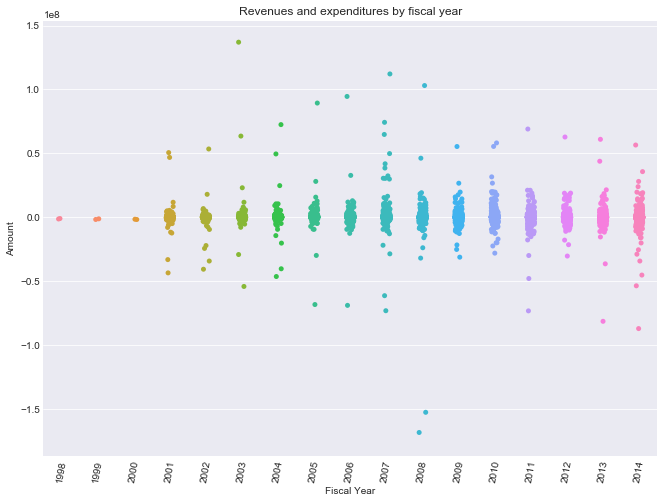

In [208]:
sns.stripplot(x='Fiscal Year', y='Amount', data=tifhist_df, jitter=True)
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 8)
plt.title('Revenues and expenditures by fiscal year')

In [209]:
expenditure = tifhist_df.loc[tifhist_df['Type']=='Expenditures']
expenditure.head()



,Fiscal Year,TIF Number,TIF District,Type,Activity,Amount
3928,2004,T-095,Midwest,Expenditures,Financing,-392000
4157,2014,T-095,Midwest,Expenditures,Financing,-2791983
4209,2006,T-111,105th/Vincennes,Expenditures,"Admin., studies & services",-6279
4210,2003,T-111,105th/Vincennes,Expenditures,"Admin., studies & services",-136
4211,2008,T-111,105th/Vincennes,Expenditures,"Admin., studies & services",-8252


Text(0.5,1,'Individual Expenditures by Fiscal Year')

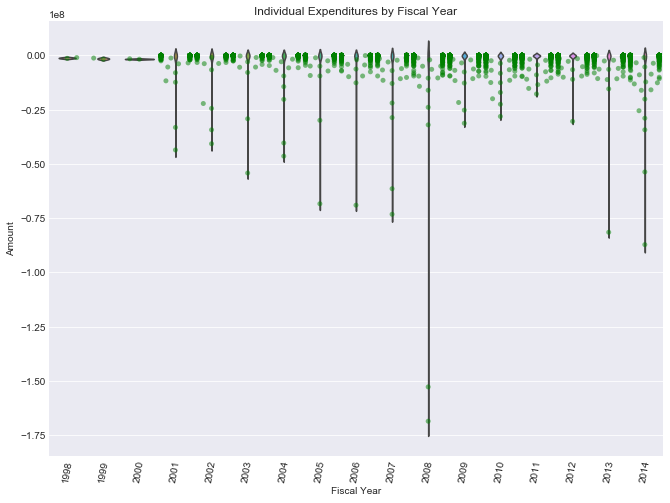

In [210]:
sns.swarmplot(x='Fiscal Year', y='Amount', data=expenditure, color='green', alpha=.5)
sns.violinplot(x='Fiscal Year', y='Amount', data=expenditure, inner=None)
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 8)
plt.title('Individual Expenditures by Fiscal Year')


In [211]:
# Make expenditures a positive value
expenditure.Amount = expenditure.Amount.apply(lambda x: x*-1)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(0.5,1,'All Expenditures by Fiscal Year')

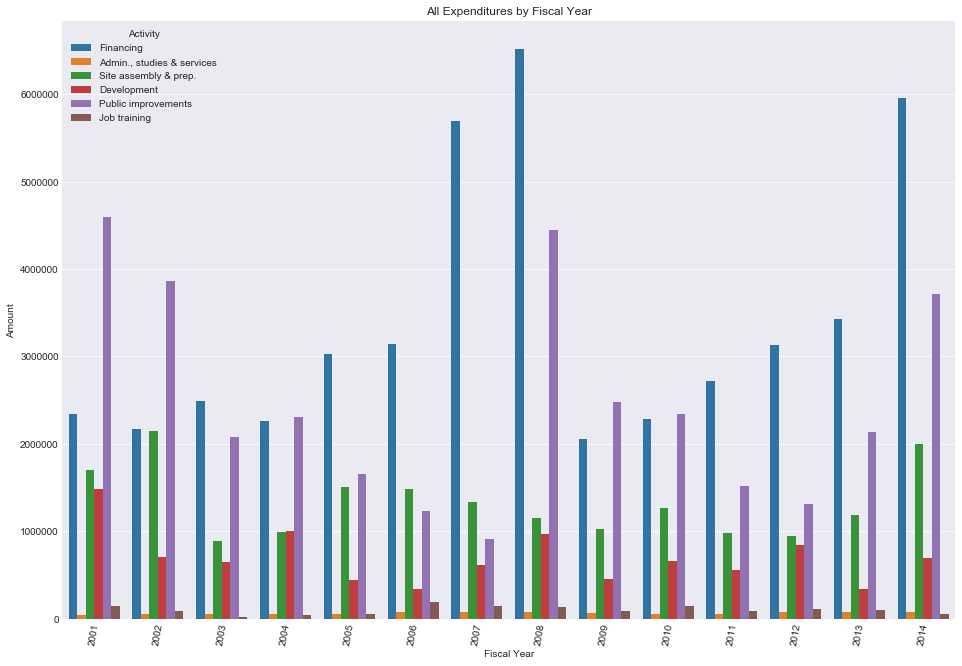

In [212]:
sns.barplot(x='Fiscal Year', y='Amount', data=expenditure[expenditure['Fiscal Year']>2000], ci=None, hue='Activity')
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)
plt.title('All Expenditures by Fiscal Year')

Text(0.5,1,'Expenditures by Activity Type')

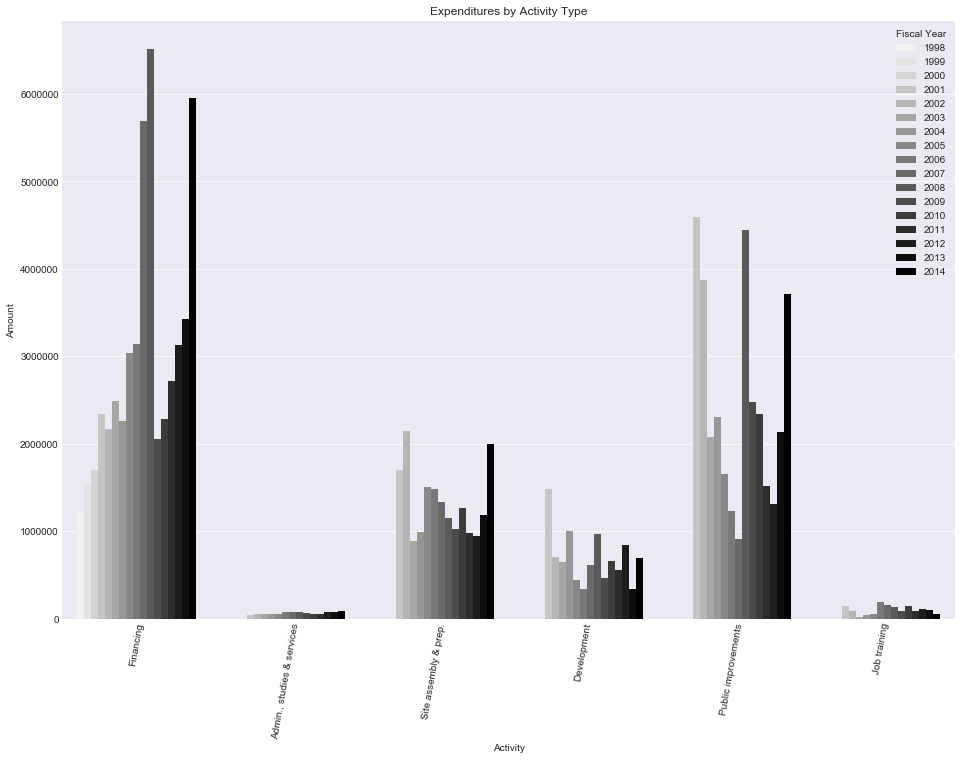

In [213]:
sns.barplot(x='Activity', y='Amount', data=expenditure, hue='Fiscal Year', ci=None, color='black')
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)
plt.title('Expenditures by Activity Type')

Text(0.5,1,'Expenditures by Activity Type')

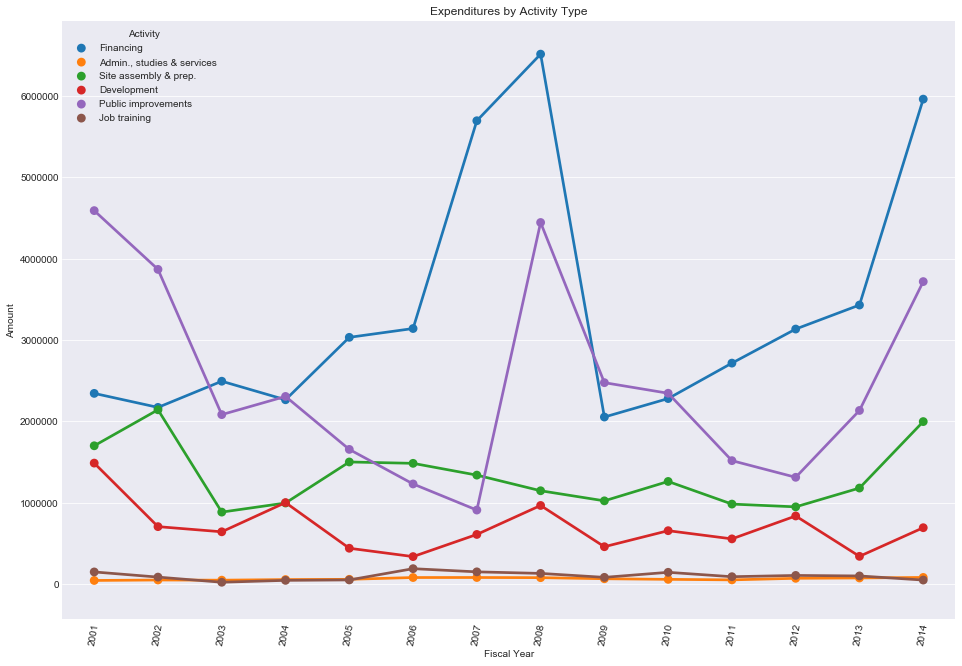

In [240]:
sns.pointplot(x='Fiscal Year', y='Amount', data=expenditure[expenditure['Fiscal Year']>2000], hue='Activity', ci=None, units='Amount')
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)
plt.title('Expenditures by Activity Type')

Text(0.5,1,'Job Training Expenditures by Year')

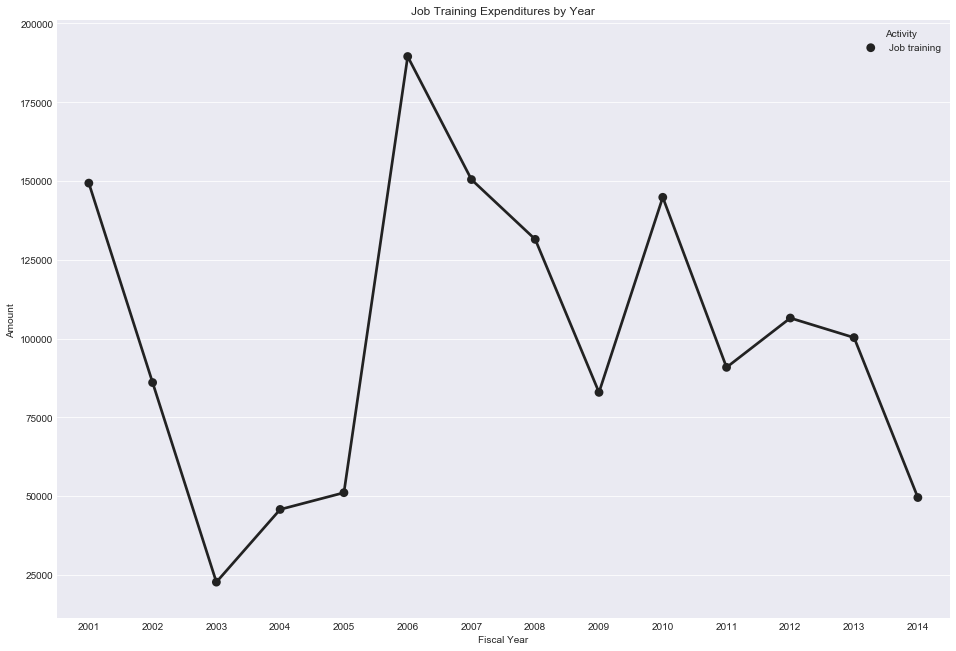

In [238]:
sns.pointplot(x='Fiscal Year', y='Amount', data=expenditure[expenditure['Activity']=='Job training'], 
            hue='Activity', ci=None, color='green')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 11)
plt.title('Job Training Expenditures by Year')

In [224]:
expenditure[expenditure['Activity']=='Job training']
expenditure.head()

,Fiscal Year,TIF Number,TIF District,Type,Activity,Amount
3928,2004,T-095,Midwest,Expenditures,Financing,392000
4157,2014,T-095,Midwest,Expenditures,Financing,2791983
4209,2006,T-111,105th/Vincennes,Expenditures,"Admin., studies & services",6279
4210,2003,T-111,105th/Vincennes,Expenditures,"Admin., studies & services",136
4211,2008,T-111,105th/Vincennes,Expenditures,"Admin., studies & services",8252


In [217]:
job_train['Amount'] = job_train['Amount'].apply(lambda x: x*-1)
job_train.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Fiscal Year,TIF Number,TIF District,Type,Activity,Amount
8085,2007,T-125,119th/I-57,Expenditures,Job training,133401
8086,2008,T-125,119th/I-57,Expenditures,Job training,106599
8087,2014,T-125,119th/I-57,Expenditures,Job training,8500
8088,2005,T-072,24th/Michigan,Expenditures,Job training,8894
8089,2004,T-072,24th/Michigan,Expenditures,Job training,2


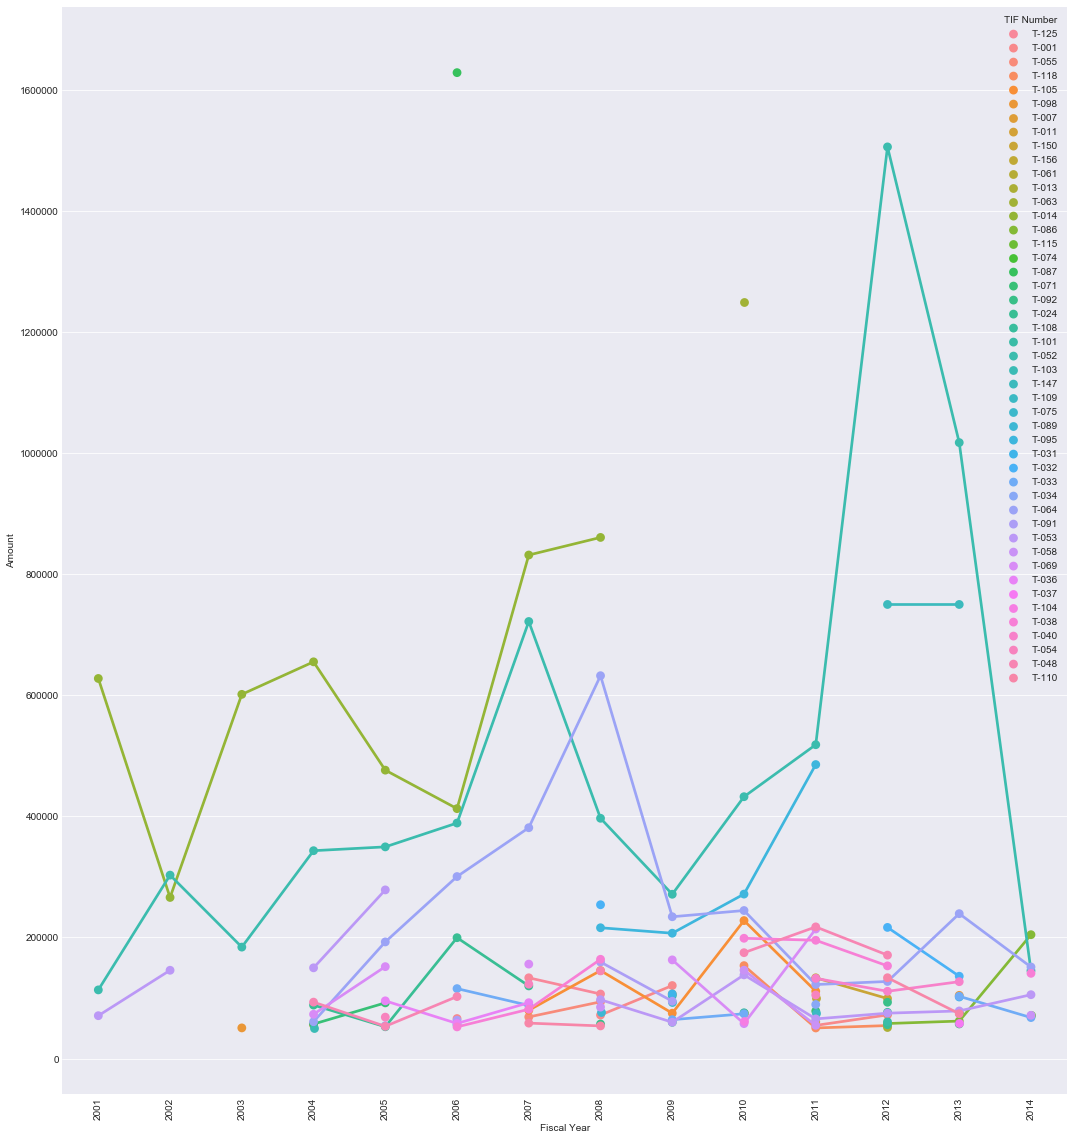

In [218]:
sns.pointplot('Fiscal Year', 'Amount', data=job_train[job_train['Amount']>50000], hue='TIF Number')
plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 20)

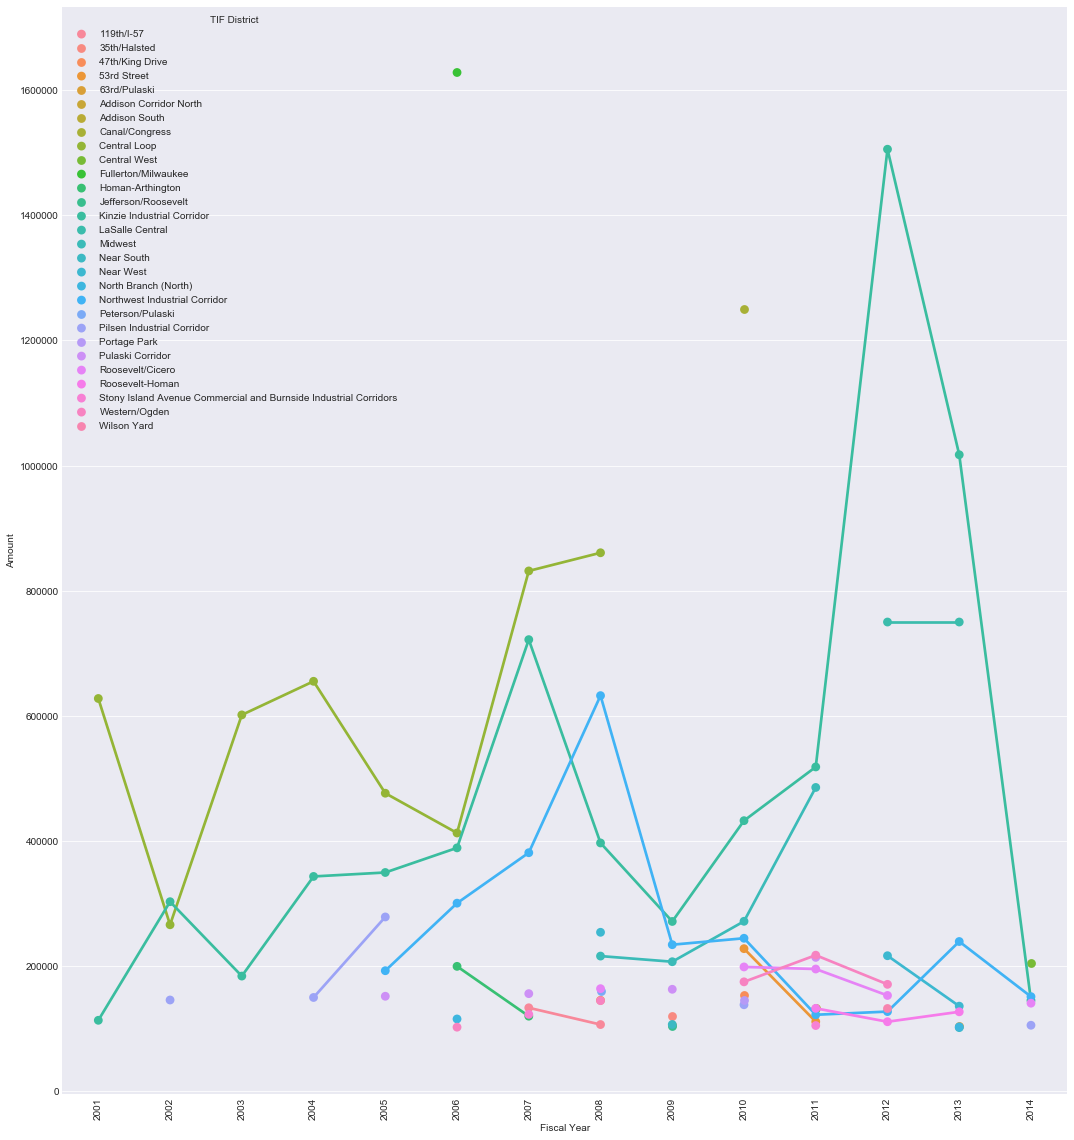

In [219]:
sns.pointplot('Fiscal Year', 'Amount', data=job_train[job_train['Amount']>100000], hue='TIF District')
plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 20)

In [220]:
job_train.columns

Index(['Fiscal Year', 'TIF Number', 'TIF District', 'Type', 'Activity',
       'Amount'],
      dtype='object')

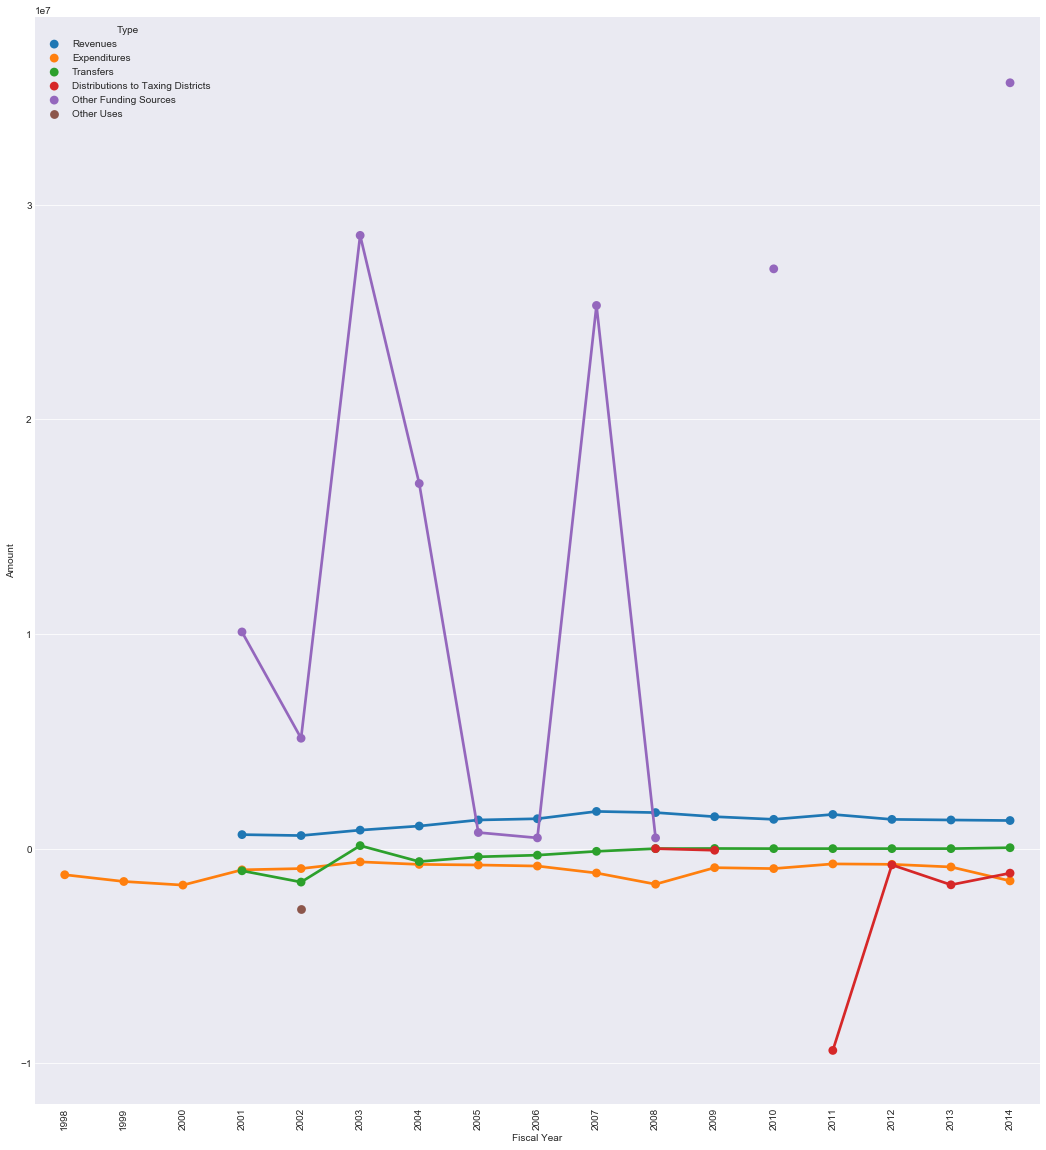

In [221]:
sns.pointplot(x='Fiscal Year', y='Amount', hue='Type', data=tifhist_df, units='Amount', ci=None)
plt.plot(y=0)
plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 20)

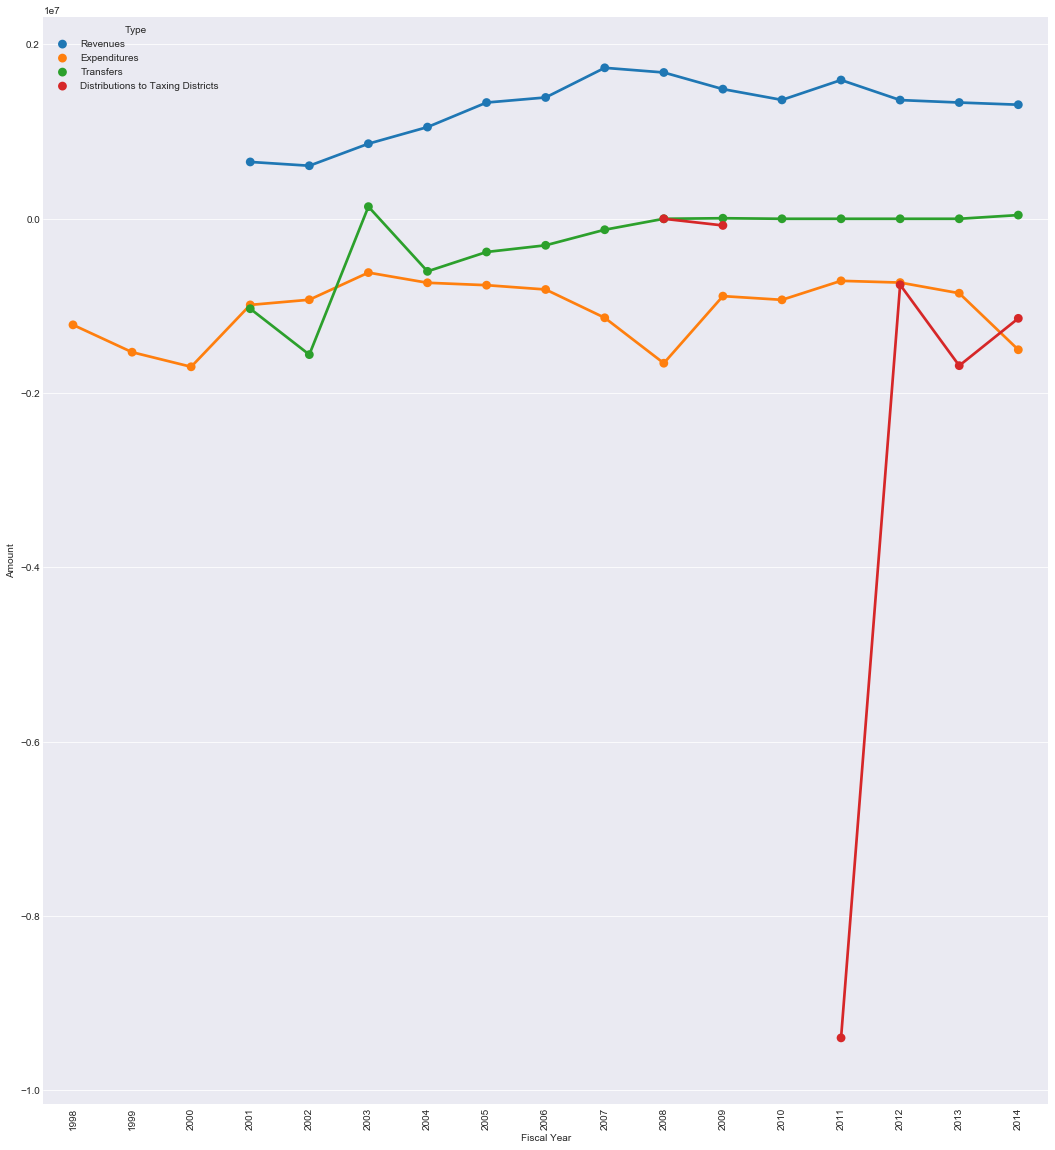

In [232]:
sns.pointplot(x='Fiscal Year', y='Amount', hue='Type', 
              data=tifhist_df[tifhist_df['Type'].isin(['Revenues', 'Expenditures', 'Transfers',
       'Distributions to Taxing Districts',])], 
                              units='Amount', ci=None)
plt.plot(y=0)
plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 20)

In [230]:
tifhist_df.Type.unique()

array(['Revenues', 'Expenditures', 'Transfers',
       'Distributions to Taxing Districts', 'Other Funding Sources',
       'Other Uses'], dtype=object)